**NOMBRE:** Elizabeth Peredo

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import datetime
import locale
import math
from math import log, log10
from IPython.display import display, HTML
from tabulate import tabulate
import scipy.stats as ss
import plotly.express as px
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

In [64]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

url='https://drive.google.com/file/d/1VmtLJ1YCVFTqkExGtJ6V-m1kri2IbL4J/view?usp=drivesdk'
file_id = url.split('/')[-2]

fileDownloaded = drive.CreateFile({'id':file_id})

fileDownloaded.GetContentFile('datos_ventas.csv')

df = pd.read_csv('datos_ventas.csv', delimiter=';')
df.head()

,Fecha_anual,Inversion,Ventas
0,1980,"1,00","4,61"
1,1981,"1,50","5,18"
2,1982,"2,00","5,09"
3,1983,"2,50","5,44"
4,1984,"3,00","0,62"


In [65]:
df_new=df.copy()

In [66]:
df_new['Ventas']= df["Ventas"].str.replace(',', '.', case = False)
df_new['Ventas'] = df_new['Ventas'].astype(float)

df_new['Inversion']= df["Inversion"].str.replace(',', '.', case = False)
df_new['Inversion'] = df_new['Inversion'].astype(float)

# Modelo de regresion lineal. Obtener una estimacion de los parametros del modelo y su interpretacion

In [67]:
df_new['Beneficio']=df_new['Ventas']-df_new['Inversion']

In [68]:
df_year=pd.pivot_table(df_new,index=['Fecha_anual'], 
               values=['Inversion', 'Ventas','Beneficio'], 
               aggfunc=['sum'], 
               margins=True)

df_year.tail(5)

sum                  
            Beneficio Inversion  Ventas
Fecha_anual                            
2014            -3.36      18.0   14.64
2015            -2.29      18.5   16.21
2016            -2.28      19.0   16.72
2017            -2.05      19.5   17.45
All              9.23     389.5  398.73

La tabla precedente muestra que existen perdidas en ciertos años, debido a que las ventas no cubren la inversion inicial. Sin embargo, los beneficios globales desde 1980 a 2017 generaron beneficios de 9.23 millones.

## **ANALISIS 1**

Para el primer analisis se esta considerando 3 variables, las variables independientes son FECHA_ANUAL e INVERSIÓN y la variable dependiente es la de VENTAS

Coeficiente de determinación (R²): 0.79180604456645
Error cuadrático medio (MSE): 7.8693798627853395


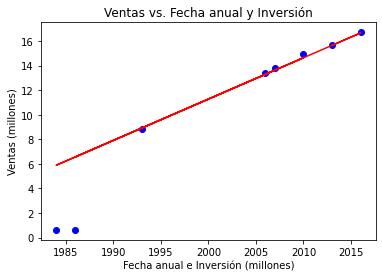

In [69]:
X = df_new[["Fecha_anual", "Inversion"]]
y = df_new["Ventas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# PREDICCIÓN
y_pred = model.predict(X_test)

# MÉTRICAS
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficiente de determinación (R²):", r2)
print("Error cuadrático medio (MSE):", mse)

plt.scatter(X_test["Fecha_anual"], y_test, color="blue")
plt.plot(X_test["Fecha_anual"], y_pred, color="red")
plt.title("Ventas vs. Fecha anual y Inversión")
plt.xlabel("Fecha anual e Inversión (millones)")
plt.ylabel("Ventas (millones)")
plt.show()


## **ANALISIS 2**

Para comprobar las diferencias, en este segundo analisis se esta considerando las varaibles Inversion y Ventas

Coeficiente de determinación (R²): 0.7917446219870267
Error cuadrático medio (MSE): 7.871701532540966


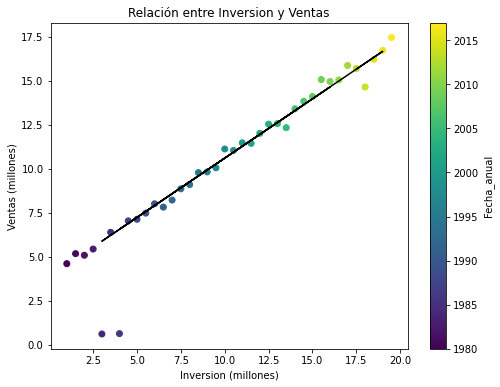

In [70]:
X = df_new["Inversion"].values.reshape(-1, 1)
y = df_new["Ventas"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficiente de determinación (R²):", r2)
print("Error cuadrático medio (MSE):", mse)

plt.figure(figsize=(8, 6))
plt.plot(X_test, y_pred, color="black")
plt.scatter(df_new['Inversion'], df_new['Ventas'], 
            c=df_new['Fecha_anual'], cmap='viridis')  
plt.colorbar(label='Fecha_anual') 
plt.title('Relación entre Inversion y Ventas')  
plt.xlabel('Inversion (millones)')  
plt.ylabel('Ventas (millones)')  
plt.show()


Los gráficos precedentes evidencian que las ventas y la inversion tiene una relacion directa, asimismo. Asimismo, el esquema de colores evidencia que los montos inversión y ventas incrementaron año tras año, excepto algunos datos que se dieron entre 1980 y 1985.

In [71]:
x = df_new[['Inversion']]
y = df_new['Ventas']

model = LinearRegression().fit(x, y)

print("Intercepto:", model.intercept_)
print("Coeficiente:", list(zip(x.columns, model.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model.score(x, y))

Intercepto: 2.8805285042127133
Coeficiente: [('Inversion', 0.7426698763540869)]
Coeficiente de determinación R^2: 0.9144759177150086


* El intercepto es el valor de la variable 
dependiente (Ventas) cuando la variable independiente (Inversion) es igual a cero. En este caso en especifico **el intercepto es de 2.88 millones**, por lo tanto este dato proporciona información sobre la posición de la línea de regresión en el eje y, incluso cuando la variable independiente es cero.
* El coeficiente es la pendiente, debido a que es el cambio en la variable dependiente (Ventas) por una unidad adicional en la variable independiente (Inversion). Siendo este la tasa de cambio de la variable dependiente en función de la variable independiente. 
En este caso en especifico el **coeficiente es 0.74 millones, valor positivo** que indica una relación directa, donde un aumento en la variable independiente se asocia con un aumento en la variable dependiente.


In [72]:
y = df_new['Ventas']
#X = df_new[['Inversion', 'Fecha_anual']]
X = df_new['Inversion']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           8.25e-21
Time:                        18:33:14   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8805      0.440      6.546      0.0

Como dato adicional, el valor de skewness de -3.131 indica una asimetría negativa pronunciada en la distribución.

Por otro lado, la curtosis mide el grado de "pico" o "aplanamiento" de la distribución en relación a una distribución normal. En este modelo, el valor de curtosis es de 12.651, lo que indica una distribución con un pico muy alto y colas pesadas (distribución leptocúrtica).


# Cuantas ventas se obtendran si se invirtiesen 7 milllones de euros

In [73]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(df_new[['Inversion']], df_new['Ventas'])

nuevo_X = 7
prediccion = modelo.predict([[nuevo_X]])
beneficio = prediccion - nuevo_X
print('Predicción para Inversion =', nuevo_X, ':', prediccion[0], 'Beneficio:',beneficio)

Predicción para Inversion = 7 : 8.079217638691322 Beneficio: [1.07921764]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


Si no se considera el flujo de los años en el modelo de prediccion, al inviertier 7 millones, se tendria ventas de 8.08 millones, lo que significa que tendria beneficios de 1.08 millones.

In [74]:
y = df_new['Ventas']
X = df_new[['Inversion', 'Fecha_anual']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
nueva_inversion = pd.DataFrame({'const': 1, 
                                'Inversion': [7], 
                                'Fecha_anual': [2023]})
prediccion_ventas = round(results.predict(nueva_inversion),2)
beneficio = round(float(prediccion_ventas - 7),2)

print("""La proyección de ventas para una inversión 
de 7 millones en el año 2023 es:""", prediccion_ventas[0],""" 
millones generando beneficios de""",beneficio, " millones")


La proyección de ventas para una inversión 
de 7 millones en el año 2023 es: 8.12  
millones generando beneficios de 1.12  millones


La proyección de ventas para una inversión 
de 7 millones en el año 2023 es de 8.12  
millones generando beneficios de 1.12  millones.

# **3. Calcular SCE y el coeficiente de determinacion**

## **Suma de Cuadrados del Error**

In [75]:
# Residuos
residuos = df_new['Inversion'] - df_new['Ventas']

# Residuo estándar de error (RSE)
rse = np.sqrt(np.sum(residuos**2) / (len(df) - 2))

# Suma de cuadrados de error (SSE)
sse = np.sum(residuos**2)

print('Suma de cuadrados de error (SSE):', sse)
print('Residuo estándar de error (RSE):', rse)

Suma de cuadrados de error (SSE): 136.8159
Residuo estándar de error (RSE): 1.949472150779966


La SCE es la suma de los cuadrados de las diferencias entre los valores reales de "y" y las predicciones del modelo. Un valor de SCE más bajo indica que el modelo ajustado se ajusta mejor a los datos. 

La SSE es de 136.82 y el RSE es de 1.95, denota que el modelo de regresión lineal no explica toda la variabilidad en los datos, y que los errores residuales tienen una dispersión de alrededor de 1.95 unidades en la variable de respuesta. Cuanto menor sea la SSE y el RSE, mejor será la calidad del ajuste del modelo a los datos.

## **COEFICIENTE DE DETERMINACIÓN**

In [76]:
y_pred = modelo.predict(df_new[['Inversion']])
r2 = r2_score(df_new['Ventas'], y_pred)

print('Coeficiente de determinación:', r2)

Coeficiente de determinación: 0.9144759177150086


El valor de R² puede variar entre 0 y 1. El valor de R² en este modelo es de 0.91, valor que es cercano a 1, lo que indica que el modelo ajustado explica bien los datos, sin embargo, si este valor hubiera sido un valor cercano a 0, significaria que el modelo no se ajusta bien a los datos.